In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("home_prices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


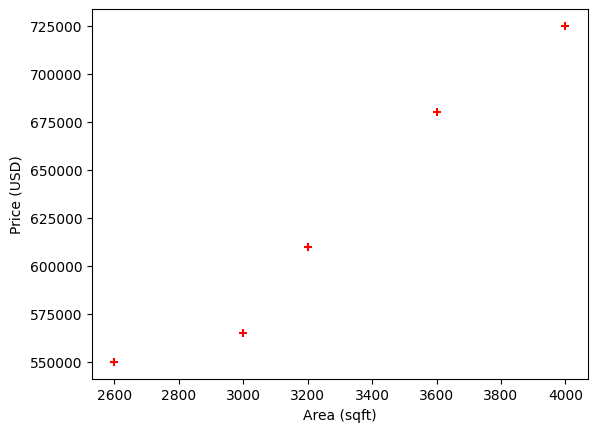

In [4]:
%matplotlib inline
plt.xlabel("Area (sqft)")
plt.ylabel("Price (USD)")
plt.scatter(df.area,df.price,color="red",marker="+")

In [5]:
#creating an object for linear regression
rg = linear_model.LinearRegression()
rg.fit(df[['area']],df.price) 
#here fit means training the model

LinearRegression()

In [6]:
#Why did we use double brackets?

In [7]:
rg.predict([[3000]])

C:\Users\Aswini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [8]:
#Explanation of how did we get the answer

In [9]:
m = rg.coef_
m

array([135.78767123])

In [10]:
x = rg.intercept_
x

180616.43835616432

In [11]:
135.78767123*3000+x

587979.4520461643

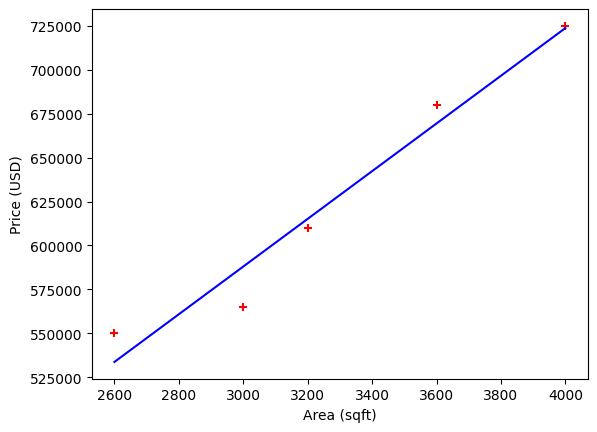

In [12]:
plt.xlabel("Area (sqft)")
plt.ylabel("Price (USD)")
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,rg.predict(df[["area"]]),color="blue")

In [13]:
test = pd.read_csv("areas.csv")
test

,2000
0,400
1,2400
2,2500
3,10000
4,3600
5,5000
6,1111


In [14]:
p=rg.predict(test)

C:\Users\Aswini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 2000
Feature names seen at fit time, yet now missing:
- area

  warnings.warn(message, FutureWarning)


In [15]:
#assigning a new colomn in data frame
test['prices'] = p
test

,2000,prices
0,400,2.349315e+05
1,2400,5.065068e+05
2,2500,5.200856e+05
3,10000,1.538493e+06
4,3600,6.694521e+05
5,5000,8.595548e+05
6,1111,3.314765e+05


In [16]:
#export without index values
test.to_csv("prediction.csv",index=False)

In [17]:
#to export the model using pickle
import pickle

In [18]:
with open('model_pickle','wb') as f:
    pickle.dump(rg,f)

In [19]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [20]:
mp.predict([[5000]])

C:\Users\Aswini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [23]:
#to export the model using joblib
import joblib

In [24]:
joblib.dump(rg,'model_joblib')

['model_joblib']

In [25]:
mj = joblib.load('model_joblib')

In [26]:
mj.predict([[5000]])

C:\Users\Aswini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])